In [6]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set()

df = pd.read_csv("all_benchmark.csv")
_max = df.groupby(["dataset","graph_type"]).agg("max").reset_index(level=0).reset_index(level=0)

<Figure size 1152x432 with 0 Axes>

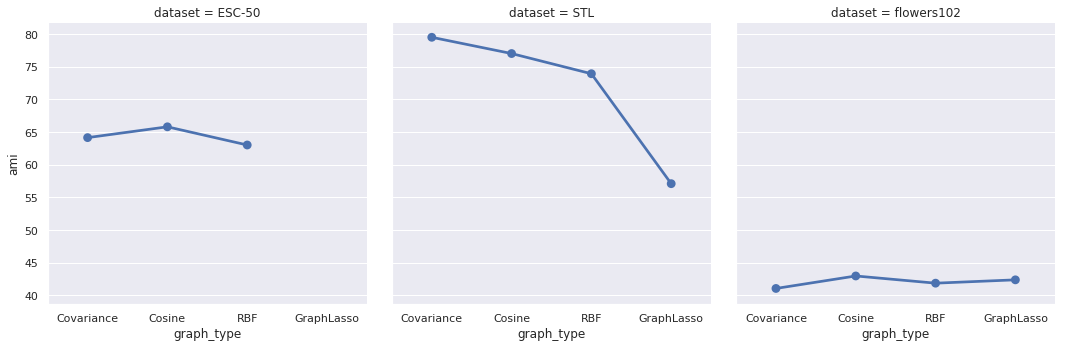

In [7]:
plt.figure(figsize=(16, 6))
ax1 = seaborn.catplot(data=_max,x="graph_type", y="ami", col="dataset",kind="point",order=["Covariance","Cosine","RBF","GraphLasso"])

<Figure size 1152x432 with 0 Axes>

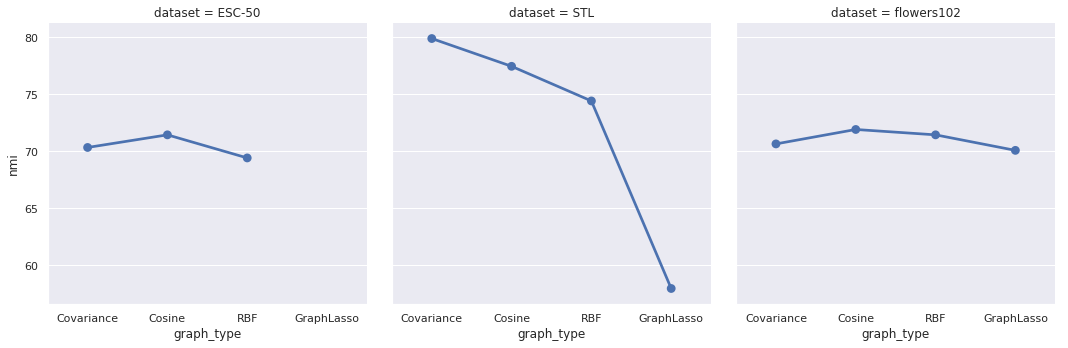

In [8]:
plt.figure(figsize=(16, 6))
ax1 = seaborn.catplot(data=_max,x="graph_type", y="nmi", col="dataset",kind="point",order=["Covariance","Cosine","RBF","GraphLasso"])

Text(0,0.5,'')

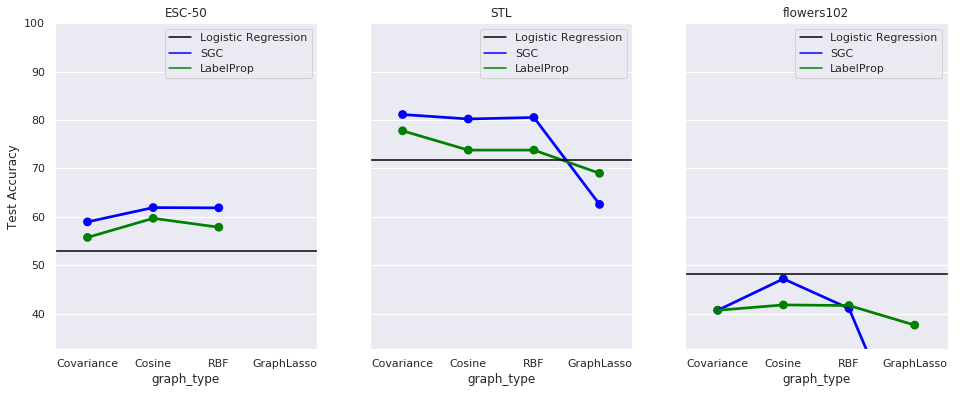

In [9]:
fig, axes =  plt.subplots(1,3,sharey=True,figsize=(16,6))
log_reg_perf = {"STL":71.63,"ESC-50":53.0,"flowers102":48.16}
for idx, dataset in enumerate(_max.dataset.unique()):
    ax = axes[idx]
    a = seaborn.pointplot(x="graph_type", y="acc_test", order=["Covariance","Cosine","RBF","GraphLasso"], 
                      ci=0,data=_max.query("dataset=='{}'".format(dataset)), ax=ax,label="SGC",color="blue")
    b = seaborn.pointplot(x="graph_type", y="label_prop_test", order=["Covariance","Cosine","RBF","GraphLasso"], 
                      ci=0,data=_max.query("dataset=='{}'".format(dataset)), ax=ax,label="Label Propagation",color="green")
    c = ax.axhline(log_reg_perf[dataset],label="Logistic Regression",color="black")    
    c = ax.axhline(0,label="SGC",color="blue")    
    c = ax.axhline(100,label="LabelProp",color="green")    
    ax.set_ylim([_max["label_prop_test"].min()-5,100])
    ax.set_title(dataset)
    ax.legend()
axes[0].set_ylabel("Test Accuracy")
axes[1].set_ylabel("")
axes[2].set_ylabel("")


In [10]:
_max

,graph_type,dataset,minmaxscaler,nn,normalization,ami,nmi,acc_train,acc_val,acc_test,label_prop_train,label_prop_val,label_prop_test
0,Cosine,ESC-50,False,1000,None,65.809469,71.433868,100.000000,0,61.894737,100.0,0,59.684211
1,Covariance,ESC-50,False,1000,None,64.156025,70.326170,100.000000,0,58.947368,100.0,0,55.736842
2,RBF,ESC-50,False,1000,None,63.028471,69.408651,100.000000,0,61.842105,100.0,0,57.842105
3,Cosine,STL,False,1000,None,77.021006,77.446254,100.000000,0,80.204082,100.0,0,73.775510
4,Covariance,STL,False,500,None,79.508474,79.883934,100.000000,0,81.122449,100.0,0,77.755102
5,GraphLasso,STL,True,1000,None,57.109480,57.953281,90.000000,0,62.551020,100.0,0,68.979592
6,RBF,STL,False,1000,None,73.931204,74.406932,100.000000,0,80.510204,100.0,0,73.775510
7,Cosine,flowers102,False,1000,None,42.987211,71.904410,100.000000,0,47.181373,100.0,0,41.789216
8,Covariance,flowers102,False,1000,None,41.077904,70.639028,97.058824,0,40.686275,100.0,0,40.686275
9,GraphLasso,flowers102,True,1000,None,42.395719,70.072479,11.274510,0,8.946078,100.0,0,37.622549
